(sec-AjusteNolineal)=
# Método de ajuste no lineal
Hasta ahora se ha visto como ajustar datos experimentales a un modelo lineal, pero es común encontrarse con datos experimentales que se ajustan a una función nolineal que no se puede linearizar. La teoría para el ajuste nolineal está fuera del alcance de estas notas, por lo que se recomienda a quien esté interesado la lectura del capítulo 7 de {cite}`Hughes2010`. Esta sección se limitará a presentar un programa de `Python` con el que se puede resolver computacionalmente este tipo de problemas. El programa que se usa se encuentra en la librería `scipy.optimize`, y se llama `curve_fit`. Para entender su funcionamiento básico se resolverá el problema de la {numref}`subsec-ejemploBola2`, directamente, sin linearizar.

En primer lugar se generan arreglos con el tiempo `t`, el desplazamiento `x`, y la incertidumbre en la posición `e`. Seguidamente se determina la incertidumbre en el desplazamiento `ex`, y se construye la gráfica ({numref}`fig-bola6a`).

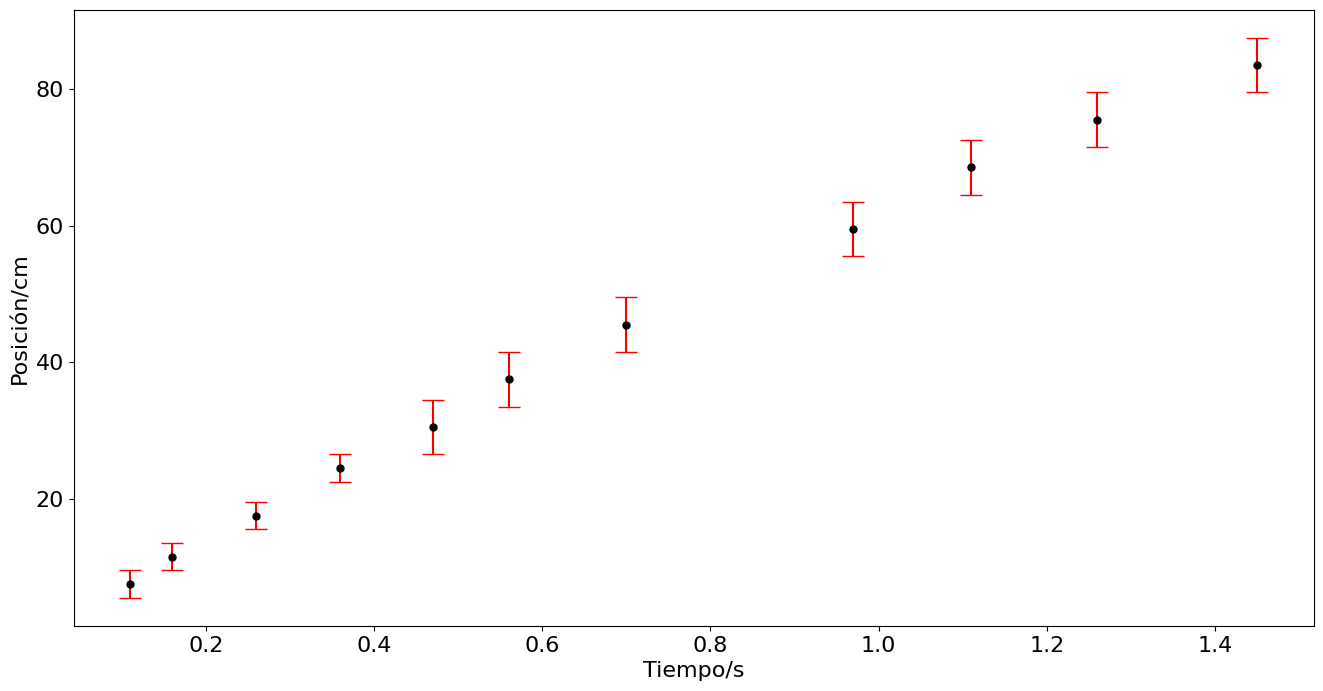

In [1]:
import numpy as np
import pylab as plt
plt.rcParams.update({'font.size': 16})

# Datos tiempo y posición
t = np.array([2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([17.0,21.0,27.0,34,40,47,55,69,78,85,93]) - 9.5 # posición en centímetros
e = np.array([0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición

## Determinación del error del desplazamiento
despM = x + 2*e
despm = x - 2*e
ex = abs(despM - despm)/2
#print('ex = {}'.format(ex))

#Graficación
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.show()

```{figure} imagenes/bola6a.png
---
scale: 90%
name: fig-bola6a
---

Variación del desplazamiento en función del tiempo, para una esfera de vidrio rodando en un piso de caucho.
```

Para el ajuste, primero se importa la función `curve_fit` y se define la función no lineal de ajuste `desacelerar`. Se ejecuta la función `curve_fit`, que requiere como parámetros, la función de ajuste `desacelerar`, el tiempo `t`, los desplazamientos `x`, y la incertidumbre en los desplazamientos `ex`. Los valores obtenidos para los parámetros de velocidad inicial `v0` y aceleración `a`, se almacenan en el arreglo `popt`. El cuadrado de las incertidumbres de los parámetros se almacenan en la diagonal del arreglo `pcov`. Finalmente, se calcula la incetidumbre de los parámetros `error`, y se grafica nuevamente, incluyendo el ajuste nolineal (ver {numref}`fig-bola6`).

popt [70.95772217 -9.0056939 ] 
error [0.70664679 0.6308763 ]


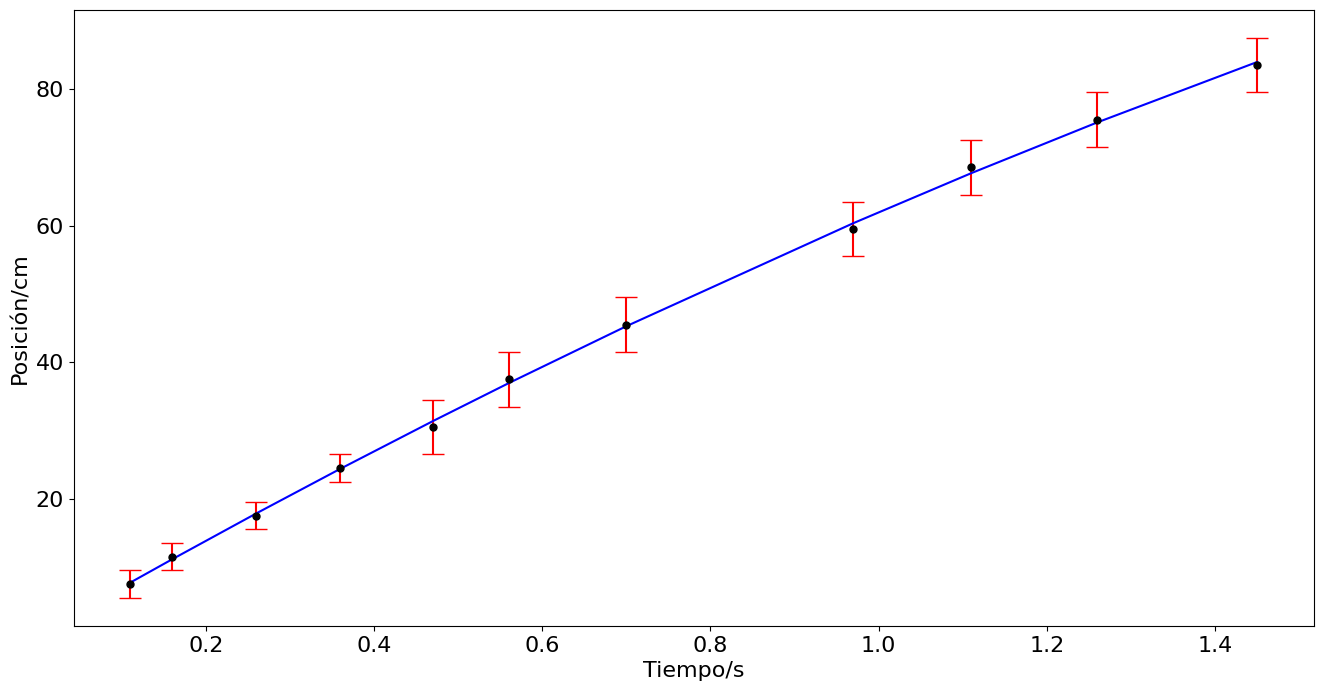

In [2]:
# Se importa la función curve_fit
from scipy.optimize import curve_fit

# Se define la función del modelo nolineal
def desacelerar(t,v0,a):
    return  v0*t + a*t**2

# Se ejecuta curve_fit y se determinan las incertidumbres de los parámetros. Se imprimem en pantalla
popt,pcov = curve_fit(desacelerar,t,x,sigma=ex)
error = np.sqrt(np.diag(pcov))
print('popt',popt,'\nerror',error)

# Se construye una nueva gráfica incluyendo el ajuste
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.plot(t,desacelerar(t,*popt),'b')
plt.show()

```{figure} imagenes/bola6.png
---
scale: 90%
name: fig-bola6
---

Variación del desplazamiento en función del tiempo, para una esfera de vidrio rodando en un piso de caucho. Se incluye el ajuste no lineal de la función $x = v_0 t + a t^2$, con parámetros $a = - 9.0\,\text{cm/s}^2$ y $v_0 = 71.0\,\text{cm/s}$.
```

El ajuste no lineal con `curve_fit` nos entrega una aceleración igual a $a = (-9.0 \pm 0.6)\,\text{cm/s}^2$. Este valor concuerda con la aceleración obtenida usando mínimos cuadrados con pesos, en la función linearizada, pero ahora con una mayor precisión.